## **Inspect Model**

### **Imports**

In [6]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")
print('Root directory:',ROOT_DIR)

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    print(f"Folder '{LOGS_DIR}' created.")

Root directory: c:\Users\abell\Documents\aa_delft\J4\BEP\ai


In [17]:
%load_ext autoreload
%autoreload 2
import bep.utils as utils
from bep.dataset import bepDataset

### **Configurations**

In [35]:
import tdmms.tdmcoco as tdmcoco
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3  # thin, few, thick
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

In [32]:
utils.create_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1), use_bs=True)

Creating directories from batches
Using batch split data
Found batches: batch1, batch2, batch3, batch4, batch6, batchsplit
Total image count: 96
Copying images
Checking image counts
Creating and writing annotation files


### **Load data**

In [33]:
utils.check_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1), True)

train, val, test = utils.load_train_val_datasets(ROOT_DIR, use_bs=True)

split = bepDataset()
split.load_dir(os.path.join(ROOT_DIR, 'data'), 'batchsplit', reload_annotations=False)
split.prepare()

print("BEP Train NbSe2 images: {} | Classes: {}".format(len(train.image_ids), train.class_names))
print("BEP Val NbSe2 images: {} | Classes: {}".format(len(val.image_ids), val.class_names))
print("BEP Test NbSe2 images: {} | Classes: {}".format(len(test.image_ids), test.class_names))
print("BEP Split NbSe2 images: {} | Classes: {}".format(len(split.image_ids), split.class_names))

Directory setup correctly
BEP Train NbSe2 images: 84 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Val NbSe2 images: 10 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Test NbSe2 images: 9 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Split NbSe2 images: 60 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


### **Load Model**

In [36]:
BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', '20241123-173838_nbse2_wte2_4_True_89_2__0113.h5')


model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='NbSe2 Fine-tuned Model')
print("NbSe2 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
NbSe2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\weights\20241123-173838_nbse2_wte2_4_True_89_2__0113.h5


### **Run Model**

In [37]:
run_model = utils.runModel(model_NbSe2, config, plot_size=15)

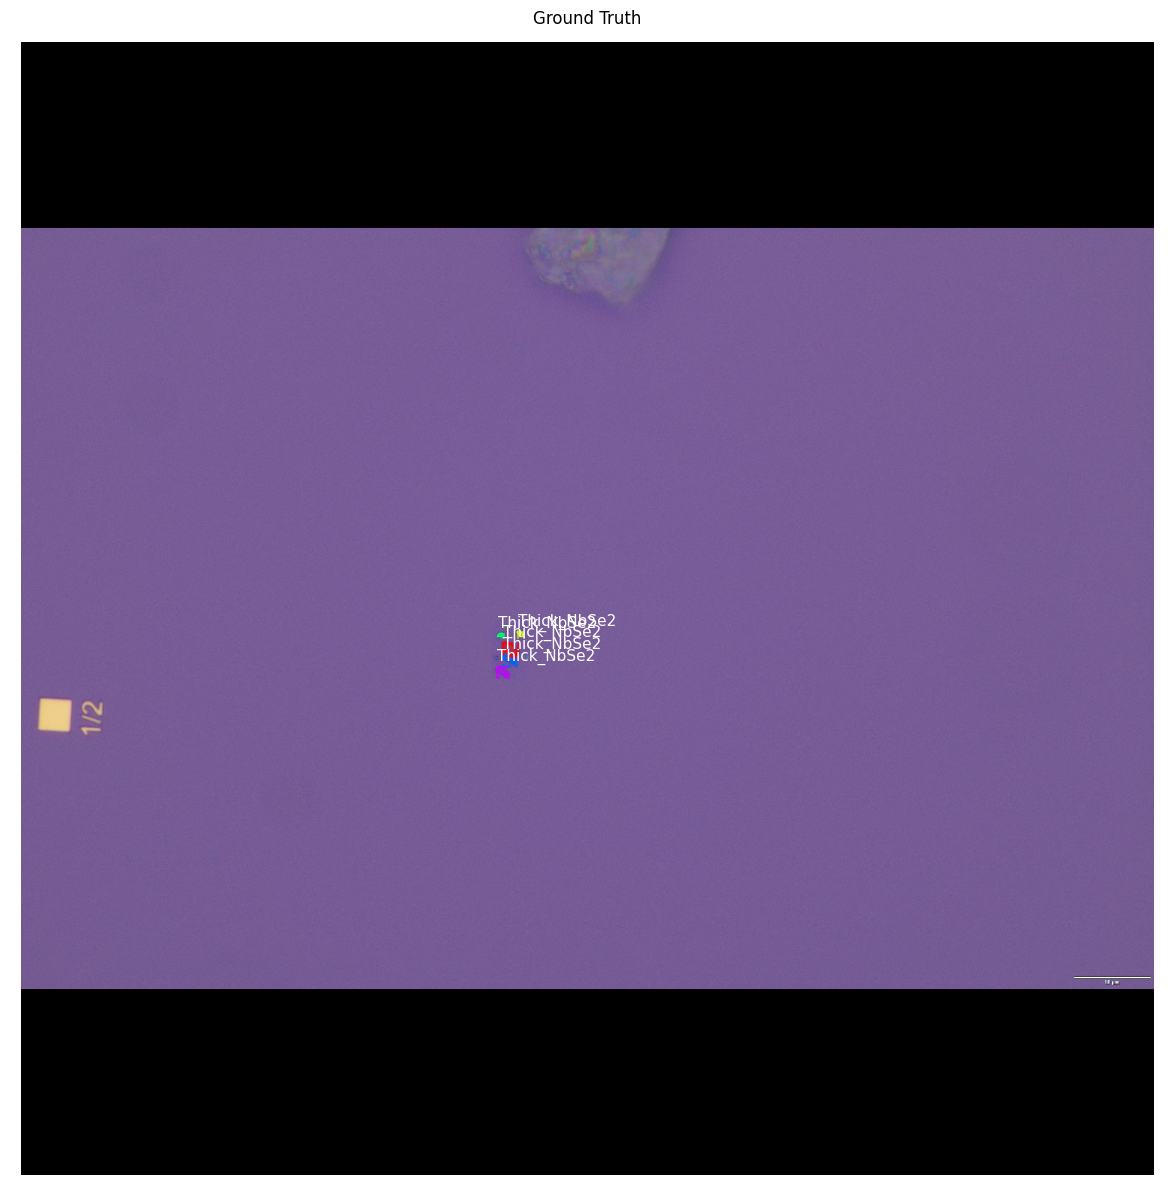

In [53]:
# run_model.run(dataset=val, rand=True)
run_model.gt(dataset=train, rand=True)

image ID: ali.2 (1) 
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


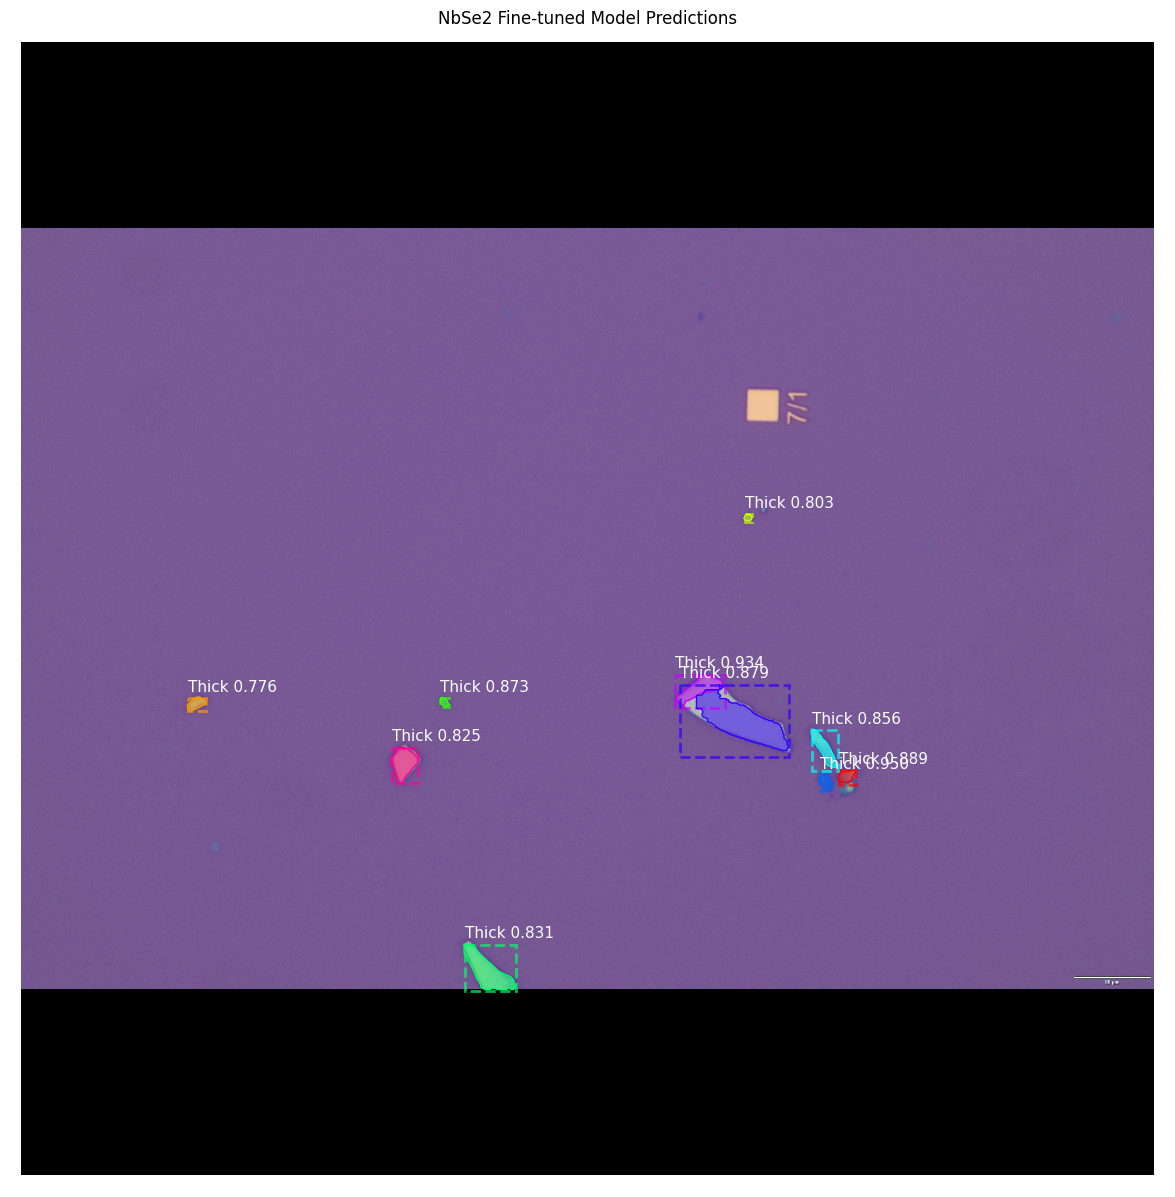

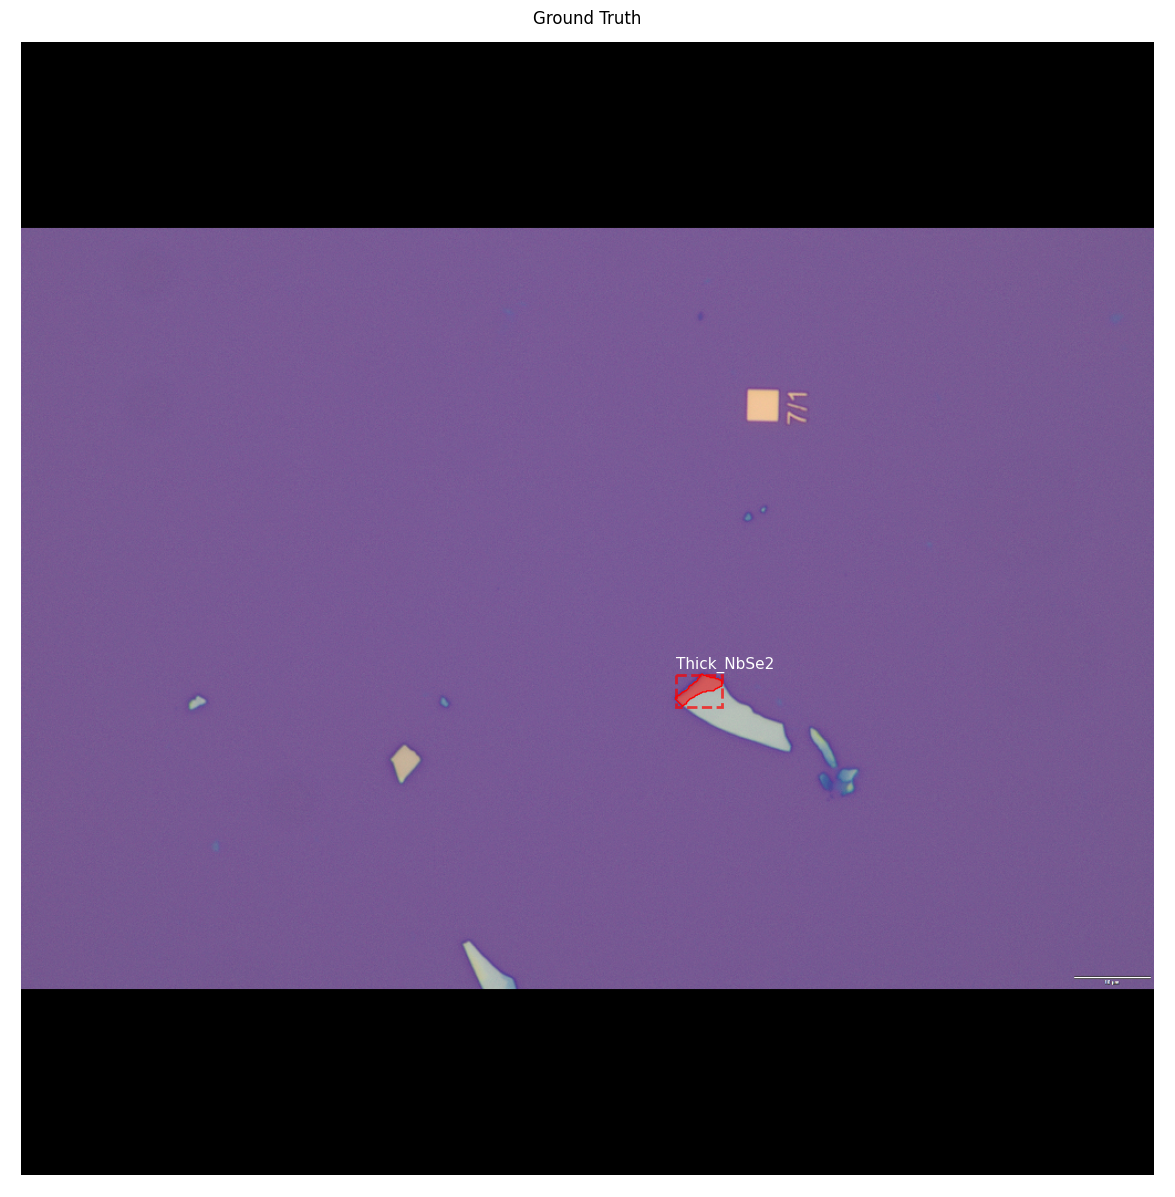

In [8]:
run_model.run(dataset=test, image_idx=1)
run_model.gt()

In [9]:
run_model.run(dataset=test, image_idx=2)
run_model.gt()

image ID: ali.3 (2) 
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  233.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  113.20000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
